Imports

In [88]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
cutoff = True
cutoff_threshold = 1000
remove_zero = False

Load Data

In [90]:
df_test = pd.read_pickle(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\TestDataFinalized.pkl")
df_train = pd.read_pickle(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\TrainingDataFinalized.pkl")

Drop extra index column

In [91]:
df_train.drop(labels="index",axis=1,inplace=True)
df_test.drop(labels="index",axis=1,inplace=True)

In [92]:
df_train_og = df_train.copy()

Split into test and train data

In [93]:
y_train = df_train['Litres']
#y_test = df_test['Litres']

X_train = df_train.drop(labels=['Litres','WeekStarting',"Customer",
       #,'WeekNumber'
       #,'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi','Ege Bölgesi', 'Güneydoğu Anadolu Bölgesi', 
       #'Karadeniz Bölgesi', 'Marmara Bölgesi', 'İç Anadolu Bölgesi'
       ],axis=1)

X_test = df_test.drop(labels=['Litres','WeekStarting',"Customer",
       #,'WeekNumber'
       #,'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi',
       #'Ege Bölgesi', 'Güneydoğu Anadolu Bölgesi', 'Karadeniz Bölgesi',
       #'Marmara Bölgesi', 'İç Anadolu Bölgesi'
       ],axis=1)


In [94]:
df_train.columns

Index(['Customer', 'WeekStarting', 'Litres', 'WeekendHolidays',
       'WeekdayHolidays', 'WeekNumber', 'Price(t-1)', 'Price%Change',
       'NewCars', 'GDPGrowth%', 'MoMInflation%', 'WoWUSDChange%',
       'Litres(w-51)', 'Litres(w-52)', 'Litres(w-53)', 'Litres(w-54)',
       'Litres(w-51_average_city)', 'Litres(w-52_average_city)',
       'Litres(w-53_average_city)', 'Litres(w-54_average_city)',
       'Litres(w-51_average_area)', 'Litres(w-52_average_area)',
       'Litres(w-53_average_area)', 'Litres(w-54_average_area)', 'Benzin',
       'Motorin', 'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi', 'Ege Bölgesi',
       'Güneydoğu Anadolu Bölgesi', 'Karadeniz Bölgesi', 'Marmara Bölgesi',
       'İç Anadolu Bölgesi', 'Autumn', 'Fall', 'Summer', 'Winter'],
      dtype='object')

Performance Plotting Functions

In [95]:
def model_evolution_loss(history):  
    # summarize history for loss
    #plt.ylim(0,2)
    plt.plot(history.history['val_loss'],color='r',label="Validation")
    plt.plot(history.history['loss'],color='b',label="Training")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Valid set evaluation:", model.evaluate(X_valid,y_valid))
    print("Test set evaluation:", model.evaluate(X_train_test,y_train_test))

In [96]:
# SO we dont get errors
df_train.loc[df_train["Litres"] == 0, "Litres"] = 0.01

Optionally remove weeks with zreo orders

In [97]:
remove_zero = False
if remove_zero == True:
    df_train = df_train[df_train["Litres"] > 1]

cutoff = False
cutoff_threshold = 1000

if cutoff == True:
    df_train = df_train[df_train["Litres"] > cutoff_threshold]


In [98]:
df_train[df_train["Litres"] < 10000]

,Customer,WeekStarting,Litres,WeekendHolidays,WeekdayHolidays,WeekNumber,Price(t-1),Price%Change,NewCars,GDPGrowth%,MoMInflation%,WoWUSDChange%,Litres(w-51),Litres(w-52),Litres(w-53),Litres(w-54),Litres(w-51_average_city),Litres(w-52_average_city),Litres(w-53_average_city),Litres(w-54_average_city),Litres(w-51_average_area),Litres(w-52_average_area),Litres(w-53_average_area),Litres(w-54_average_area),Benzin,Motorin,Akdeniz Bölgesi,Doğu Anadolu Bölgesi,Ege Bölgesi,Güneydoğu Anadolu Bölgesi,Karadeniz Bölgesi,Marmara Bölgesi,İç Anadolu Bölgesi,Autumn,Fall,Summer,Winter
21,10048261,2015-06-15,5088.00,0.0,0.0,-0.136737,-1.104813,-0.0084,-0.957270,-0.237204,-0.260466,-0.401656,0.119187,0.277084,0.031551,0.073388,-0.151287,0.227781,0.008800,-0.019747,0.370006,0.208775,0.225935,-0.102171,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
22,10048261,2015-06-29,0.01,0.0,0.0,-0.001426,-1.104813,-0.0084,-0.950081,-0.237204,-0.260466,0.189537,0.016364,-0.062488,0.122169,0.280834,-0.009199,-0.411007,-0.148335,0.233351,0.084909,-0.322635,0.375716,0.215204,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
203,10048263,2015-01-19,9442.00,0.0,0.0,-1.557495,-1.557341,-0.0084,-0.990184,-0.404855,0.349884,0.266315,-0.970394,-0.086855,-0.125379,-0.240462,-0.266845,-0.096913,-0.244779,-0.320334,-0.266662,0.063747,-0.009526,-0.253587,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
491,10048264,2016-12-26,9551.00,1.0,0.0,1.689953,-0.670755,-0.0084,-0.924100,-1.382823,0.054279,-0.033120,-0.377127,-0.459838,-0.460799,-0.379051,-0.442146,-0.344447,-0.448773,-0.399218,-0.291678,-0.083890,0.119941,0.127856,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
494,10048264,2017-01-30,0.01,0.0,0.0,-1.489840,-0.495284,-0.0084,-0.913881,-1.382823,0.426444,-1.933383,-0.498886,-0.460738,-0.374895,-0.458825,0.006801,-0.448598,-0.274401,-0.494141,0.257490,-0.274224,-0.029580,0.047494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380864,12655800,2018-11-19,5001.00,0.0,0.0,1.351677,1.333300,-0.0084,-0.562529,0.573113,3.410142,-0.470756,-0.624394,-0.588118,-0.630592,-0.564708,-0.815959,-0.769308,-0.827033,-0.738022,-1.077736,-0.992247,-1.064174,-0.982869,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380867,12655800,2018-12-10,8541.00,0.0,0.0,1.554642,0.880772,-0.0084,-0.602337,0.573113,3.410142,0.285510,-0.596617,-0.581050,-0.628299,-0.621729,-0.778766,-0.759827,-0.823953,-0.814597,-1.030673,-1.002712,-1.038321,-1.077681,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380880,12663274,2018-12-17,9620.00,0.0,0.0,1.622298,0.982360,-0.0084,-1.078365,-0.432797,3.033724,-0.478434,-0.776619,-0.775231,-0.774434,-0.774372,-1.019783,-1.020302,-1.020210,-1.019587,-1.086419,-1.175195,-1.102357,-1.155318,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380883,12663344,2018-12-17,9701.00,0.0,0.0,1.622298,0.963889,-0.0084,-1.078365,-0.432797,3.033724,-0.478434,-0.815327,-0.793793,-0.736127,-0.849494,-1.071611,-1.045200,-0.968765,-1.120471,-1.086419,-1.175195,-1.102357,-1.155318,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Train Validation split

In [99]:
from sklearn.model_selection import train_test_split 
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.1)

# split the year 2018 into the validation set
valid_date_1 = '2017-01-01'
valid_date_2 ='2017-07-01'

test_date_1 = '2016-07-01'
test_date_2 = '2017-01-01'

valid_index = df_train[(df_train.WeekStarting >= valid_date_1) & (df_train.WeekStarting <= valid_date_2)].index
test_index = df_train[(df_train.WeekStarting >= test_date_1) & (df_train.WeekStarting < test_date_2)].index

#train_index = df_train[(df_train.WeekStarting >= '2017-01-01') & (df_train.WeekStarting <= '2017-07-01')].index

X_full = X_train.copy()
y_full = X_train.copy()

X_valid= X_train[X_train.index.isin(valid_index)]
y_valid = y_train[y_train.index.isin(valid_index)]

X_train_test = X_train[X_train.index.isin(test_index)]
y_train_test = y_train[y_train.index.isin(test_index)]

#X_train = X_train[X_train.index.isin(train_index)]
#y_train = y_train[y_train.index.isin(train_index)]


X_train = X_train[~(X_train.index.isin(test_index)) & ~(X_train.index.isin(valid_index))]
y_train = y_train[~(y_train.index.isin(test_index)) & ~(y_train.index.isin(valid_index))]




In [100]:
X_train

,WeekendHolidays,WeekdayHolidays,WeekNumber,Price(t-1),Price%Change,NewCars,GDPGrowth%,MoMInflation%,WoWUSDChange%,Litres(w-51),Litres(w-52),Litres(w-53),Litres(w-54),Litres(w-51_average_city),Litres(w-52_average_city),Litres(w-53_average_city),Litres(w-54_average_city),Litres(w-51_average_area),Litres(w-52_average_area),Litres(w-53_average_area),Litres(w-54_average_area),Benzin,Motorin,Akdeniz Bölgesi,Doğu Anadolu Bölgesi,Ege Bölgesi,Güneydoğu Anadolu Bölgesi,Karadeniz Bölgesi,Marmara Bölgesi,İç Anadolu Bölgesi,Autumn,Fall,Summer,Winter
0,0.0,0.0,-1.557495,-1.529635,-0.008400,-0.990184,-0.404855,0.349884,0.266315,-0.168475,0.014464,0.348988,-0.279957,-0.577493,0.060952,0.033895,-0.377463,-0.266662,0.063747,-0.009526,-0.253587,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,-1.489840,-1.474224,-0.008400,-0.990184,-0.404855,0.349884,1.452540,0.499494,-0.167086,0.015962,0.351137,0.111952,-0.577206,0.063278,0.036437,-0.117734,-0.265770,0.066508,-0.006636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,-1.422185,-1.307989,16.852303,-0.986019,-0.404855,0.349884,0.281671,-0.316271,0.500886,-0.165749,0.017492,-0.240860,0.113493,-0.576199,0.065874,-0.111683,-0.116524,-0.263756,0.069552,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,-1.354529,-1.276853,-0.008400,-0.986019,-0.404855,0.349884,-0.397817,0.065551,-0.314882,0.502815,-0.164557,-0.124067,-0.239961,0.115927,-0.574768,-0.090465,-0.110461,-0.114172,-0.261382,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,-1.286874,-1.197165,-0.008400,-0.986019,-0.404855,-1.153662,-0.236583,0.001310,0.066941,-0.313677,0.505250,0.020730,-0.122956,-0.238257,0.118618,-0.083206,-0.089198,-0.108095,-0.111494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380881,0.0,0.0,1.689953,0.982360,-0.008400,-1.078365,-0.432797,3.033724,-0.482273,-0.741571,-0.740184,-0.739355,-0.739228,-0.972855,-0.973289,-0.973100,-0.972391,-1.261915,-1.087276,-1.175241,-1.101684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380882,0.0,0.0,1.554642,0.963889,-0.008400,-1.078365,0.573113,3.410142,0.285510,-0.795180,-0.736959,-0.849416,-0.738669,-1.044636,-0.968964,-1.120910,-0.971640,-1.174150,-1.102475,-1.155882,-1.194279,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380883,0.0,0.0,1.622298,0.963889,-0.008400,-1.078365,-0.432797,3.033724,-0.478434,-0.815327,-0.793793,-0.736127,-0.849494,-1.071611,-1.045200,-0.968765,-1.120471,-1.086419,-1.175195,-1.102357,-1.155318,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
380884,0.0,0.0,1.689953,0.963889,-0.008400,-1.078365,-0.432797,3.033724,-0.482273,-0.841506,-0.813939,-0.793011,-0.735995,-1.106664,-1.072225,-1.045159,-0.968049,-1.261915,-1.087276,-1.175241,-1.101684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
n_input = X_train.shape[1]
n_input

34

Design NN

In [102]:
from tensorflow.keras.metrics import RootMeanSquaredError


model = Sequential()

# hidden layers

model.add(Dense(units=30, activation='relu', input_dim=n_input))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))

# final layer
model.add(Dense(units=1,activation='relu'))

# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
model.compile(loss="MeanSquaredLogarithmicError", optimizer='SGD',metrics=["RootMeanSquaredError"])
#model.compile(loss="MeanSquaredError", optimizer='adam',metrics=["MeanSquaredLogarithmicError","RootMeanSquaredError"])
# Train NN
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size = 64,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])


Epoch 1/100
4456/4456 [==============================] - 20s 4ms/step - loss: 1.4946 - root_mean_squared_error: 22460.8652 - val_loss: 0.9424 - val_root_mean_squared_error: 16731.8867
Epoch 2/100
4456/4456 [==============================] - 19s 4ms/step - loss: 1.1380 - root_mean_squared_error: 16577.6992 - val_loss: 0.9803 - val_root_mean_squared_error: 16377.4287
Epoch 3/100
4456/4456 [==============================] - 19s 4ms/step - loss: 1.1310 - root_mean_squared_error: 16578.0137 - val_loss: 0.8955 - val_root_mean_squared_error: 16252.1348
Epoch 4/100
4456/4456 [==============================] - 18s 4ms/step - loss: 1.1277 - root_mean_squared_error: 16599.7266 - val_loss: 0.9044 - val_root_mean_squared_error: 16323.5146
Epoch 5/100
4456/4456 [==============================] - 19s 4ms/step - loss: 1.1256 - root_mean_squared_error: 16598.9121 - val_loss: 0.8770 - val_root_mean_squared_error: 16327.6816
Epoch 6/100
4456/4456 [==============================] - 19s 4ms/step - loss: 1.

In [57]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

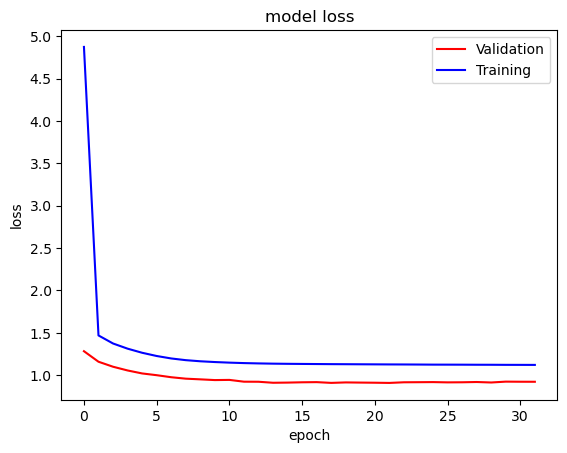

In [58]:
# Plot model evolution
model_evolution_loss(history)

In [68]:
# print metrics
#test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test)
model.evaluate(X_train_test,y_train_test)

1513/1513 [==============================] - 4s 3ms/step - loss: 0.9659 - root_mean_squared_error: 18721.8730


[0.9659141302108765, 18721.873046875]

Check that my X_test is the same order as as the original test data

In [69]:
df_test_og = pd.read_csv(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\OriginalData\test.csv")

In [70]:
(df_test_og.Customer == df_test.Customer).sum()

108472

### Plot the results from the validation dataset

In [71]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_train_test_pred = model.predict(X_train_test)

1513/1513 [==============================] - 2s 1ms/step


In [72]:
X_train["Litres(actual)"] = y_train.copy()
X_train["Litres(predicted)"] = y_train_pred.copy()
X_valid["Litres(actual)"] = y_valid.copy()
X_valid["Litres(predicted)"] = y_valid_pred.copy()
X_train_test["Litres(actual)"] = y_train_test.copy()
X_train_test["Litres(predicted)"] = y_train_test_pred.copy()

In [73]:
#plt.plot(y_train_pred)

In [74]:
df = pd.concat([X_train,X_valid, X_train_test])

In [75]:
df["WeekStarting"] = df_train["WeekStarting"].copy()

Plot

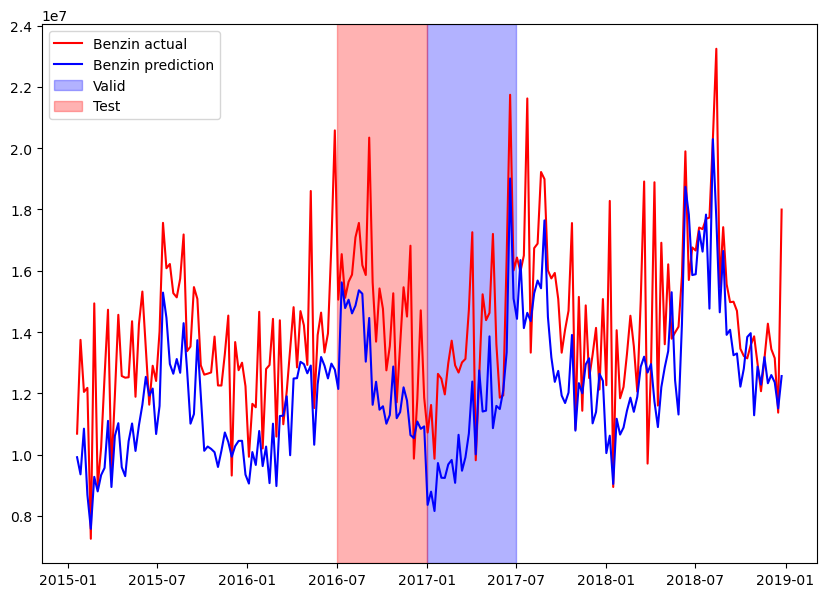

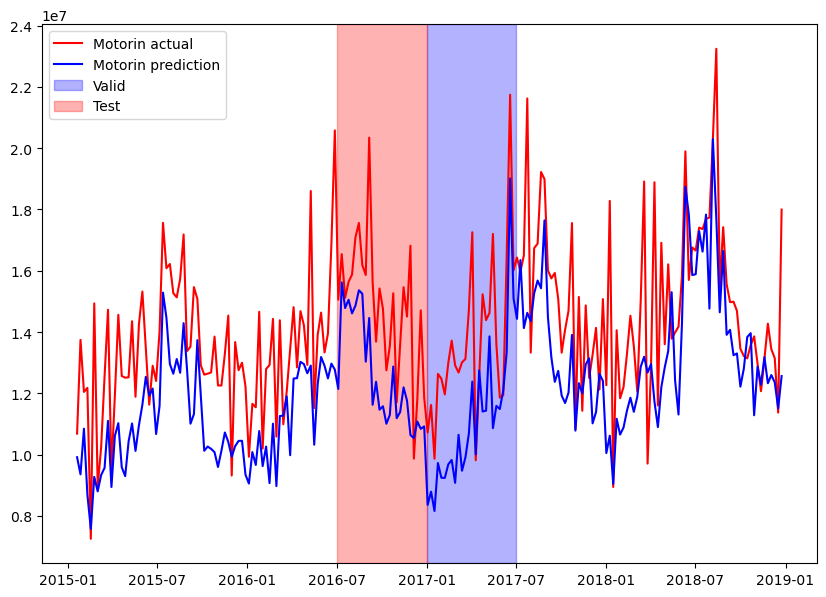

In [78]:
#Benzin
fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)

df1 = df[df["Benzin"] == 1]
df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
df1.reset_index(inplace=True)

benzin_sales_actual = df1["Litres(actual)"]
benzin_sales_pred = df1["Litres(predicted)"]
dates = df1["WeekStarting"]

ax.plot(dates,benzin_sales_actual,color='r',label="Benzin actual")
ax.plot(dates,benzin_sales_pred,color='b',label="Benzin prediction")
ax.legend()

# highlight a time range
ax.axvspan(valid_date_1, valid_date_2, color="blue", alpha=0.3,label="Valid")
ax.axvspan(test_date_1, test_date_2, color="red", alpha=0.3,label="Test")
ax.legend()

#Motorin
fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)

df2 = df[df["Motorin"] == 1]
df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()
df2.reset_index(inplace=True)

motorin_sales_actual = df2["Litres(actual)"]
motorin_sales_pred = df2["Litres(predicted)"]
dates = df2["WeekStarting"]

ax.plot(dates,benzin_sales_actual,color='r',label="Motorin actual")
ax.plot(dates,benzin_sales_pred,color='b',label="Motorin prediction")
ax.legend()

# highlight a time range
ax.axvspan(valid_date_1, valid_date_2, color="blue", alpha=0.3,label="Valid")
ax.axvspan(test_date_1, test_date_2, color="red", alpha=0.3,label="Test")
ax.legend()

#plt.plot(dates,motorin_sales/4.2)

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                1050      
                                                                 
 dense_8 (Dense)             (None, 25)                775       
                                                                 
 dense_9 (Dense)             (None, 20)                520       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 15)                315       
                                                                 
 dense_12 (Dense)            (None, 10)                160       
                                                                 
 dense_13 (Dense)            (None, 1)                

## Now do prediction

In [79]:
y_test_pred = model.predict(X_test) 

3390/3390 [==============================] - 5s 2ms/step


In [80]:
y_test_pred

array([[33081.098 ],
       [31591.77  ],
       [32315.473 ],
       ...,
       [ 7975.2935],
       [ 7577.5596],
       [ 4174.8076]], dtype=float32)

In [81]:
n = len(y_test_pred)
n

108472

In [82]:
index_values = np.linspace(0,n-1,n)
df_pred = pd.DataFrame(data = y_test_pred)
df_pred.columns=["Litres"]
df_pred.index.name = 'index'

In [83]:
df_pred.to_csv(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\SubmissionAttempts\MyTestSubmission.csv")

Plot the weekly liter sum to see estimate

In [84]:
df_test.Litres = y_test_pred

In [85]:
df = pd.concat([df_train_og,df_test])

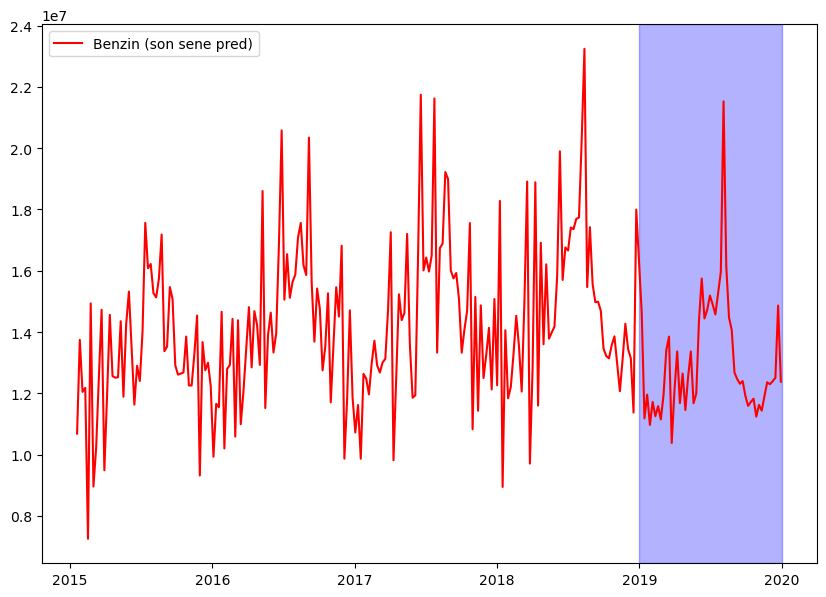

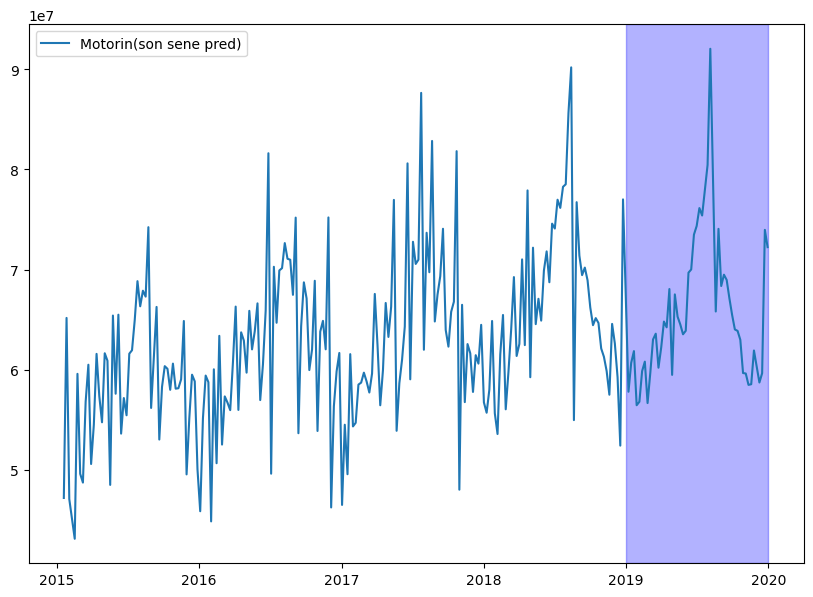

In [86]:
#Benzin


fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df1 = df[df["Benzin"] == 1]
df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
df1.reset_index(inplace=True)
benzin_sales = df1.Litres
dates = df1["WeekStarting"]
plt.plot(dates,benzin_sales,color='r',label="Benzin (son sene pred)")
ax.legend()
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df2 = df[df["Motorin"] == 1]
df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()
df2.reset_index(inplace=True)
motorin_sales = df2.Litres
dates = df2["WeekStarting"]
plt.plot(dates,motorin_sales,label="Motorin(son sene pred)")
ax.legend()

# highlight a time range
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

#plt.plot(dates,motorin_sales/4.2)